<h1><center>Actividad 3</center></h1>
<h2><center>K-Means & Affinity Propagation</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [4]:
import numpy as np
import pandas as pd
import random
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from utils import eda, clustering, visualization, dimensionality_reduction

# Load Data Set

In [2]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/Stars_2.csv")
FIGURES_PATH = "./figures/"

print(f"Total instances: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")

print(data)

Total instances: 240
Total features: 7
     Temperature              L          R    A_M  Color Spectral_Class  Type
0       0.183600       0.002400     0.1700  16.12    Red              M   0.0
1       0.035627       0.000500     0.1542  16.60    Red              M   0.0
2       0.017367       0.000300     0.1020  18.70    Red              M   0.0
3       0.022622       0.000200     0.1600  16.65    Red              M   0.0
4       0.000000       0.000138     0.1030  20.06    Red              M   0.0
..           ...            ...        ...    ...    ...            ...   ...
235     0.972150  374830.000000  1356.0000  -9.93   Blue              O   1.0
236     0.759307  834042.000000  1194.0000 -10.63   Blue              O   1.0
237     0.181025  537493.000000  1423.0000 -10.73  white              A   1.0
238     0.191692  404940.000000  1112.0000 -11.23  white              A   1.0
239     0.944352  294903.000000  1783.0000  -7.80   Blue              O   1.0

[240 rows x 7 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    float64
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    float64
dtypes: float64(5), object(2)
memory usage: 13.2+ KB


# Check for any missing values

In [5]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [6]:
# Convert categorical data into numerical data
eda.code_categorical(data, "Color")
eda.code_categorical(data, "Spectral_Class")
data.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.183600,0.002400,0.1700,16.12,3,5,0.0
1,0.035627,0.000500,0.1542,16.60,3,5,0.0
2,0.017367,0.000300,0.1020,18.70,3,5,0.0
3,0.022622,0.000200,0.1600,16.65,3,5,0.0
4,0.000000,0.000138,0.1030,20.06,3,5,0.0
5,0.023673,0.000650,0.1100,16.98,3,5,0.0
6,0.299545,0.000730,0.1270,17.22,3,5,0.0
7,0.017367,0.000400,0.0960,17.40,3,5,0.0
8,0.018681,0.000690,0.1100,17.45,3,5,0.0
9,0.019994,0.000180,0.1300,16.05,3,5,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    float64
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int8   
 5   Spectral_Class  240 non-null    int8   
 6   Type            240 non-null    float64
dtypes: float64(5), int8(2)
memory usage: 10.0 KB


# Data distribution

In [8]:
# Get summary statistics of numerical columns
numerical_summary = data.describe()

# Display summary statistics
print("Summary Statistics:\n", numerical_summary)

Summary Statistics:
        Temperature              L            R         A_M       Color  \
count   240.000000     240.000000   240.000000  240.000000  240.000000   
mean      0.223878  107188.361635   237.157781    4.382396    2.208333   
std       0.252319  179432.244940   517.155763   10.532512    1.499768   
min       0.000000       0.000080     0.008400  -11.920000    0.000000   
25%       0.036258       0.000865     0.102750   -6.232500    1.000000   
50%       0.081632       0.070500     0.762500    8.313000    3.000000   
75%       0.380403  198050.000000    42.750000   13.697500    3.000000   
max       1.000000  849420.000000  1948.500000   20.060000    5.000000   

       Spectral_Class        Type  
count      240.000000  240.000000  
mean         3.758333    0.500000  
std          2.090007    0.342279  
min          0.000000    0.000000  
25%          1.000000    0.200000  
50%          5.000000    0.500000  
75%          5.000000    0.800000  
max          6.000000   

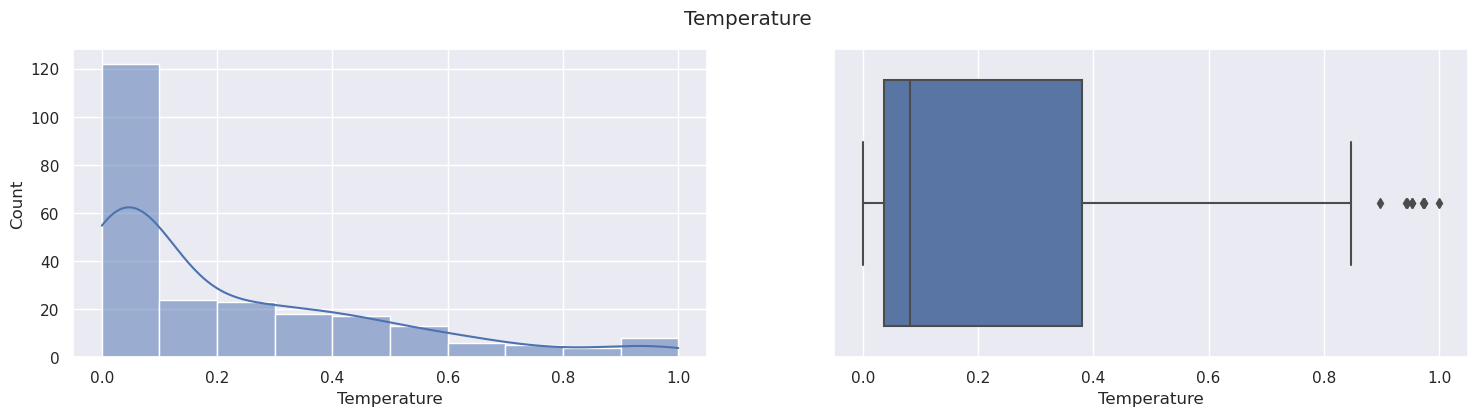

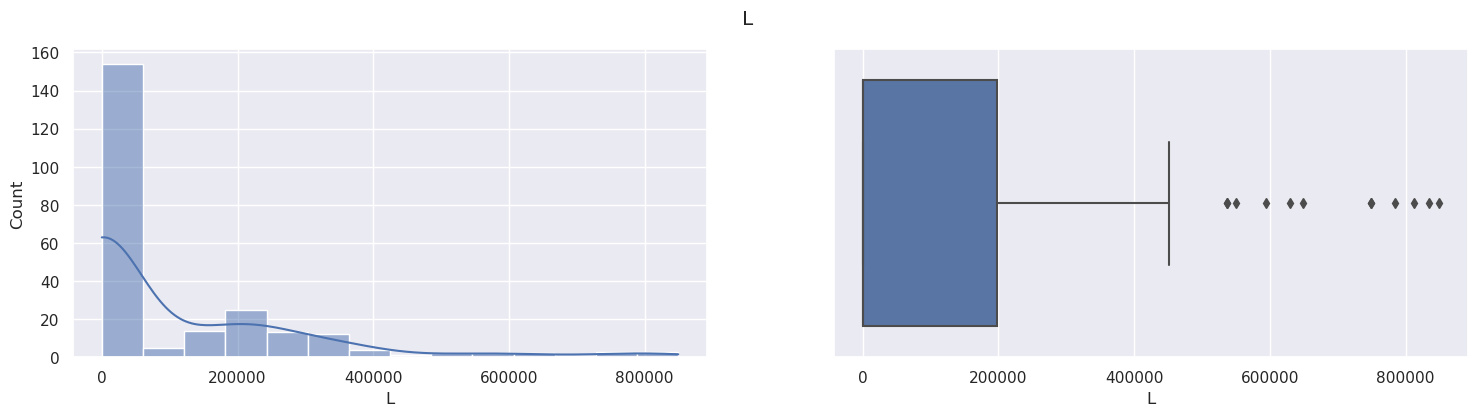

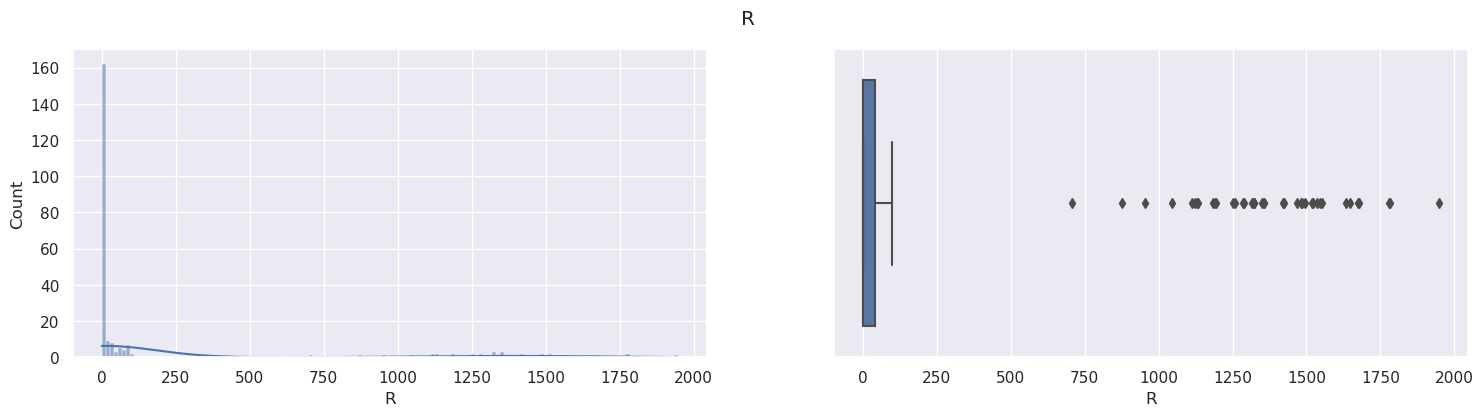

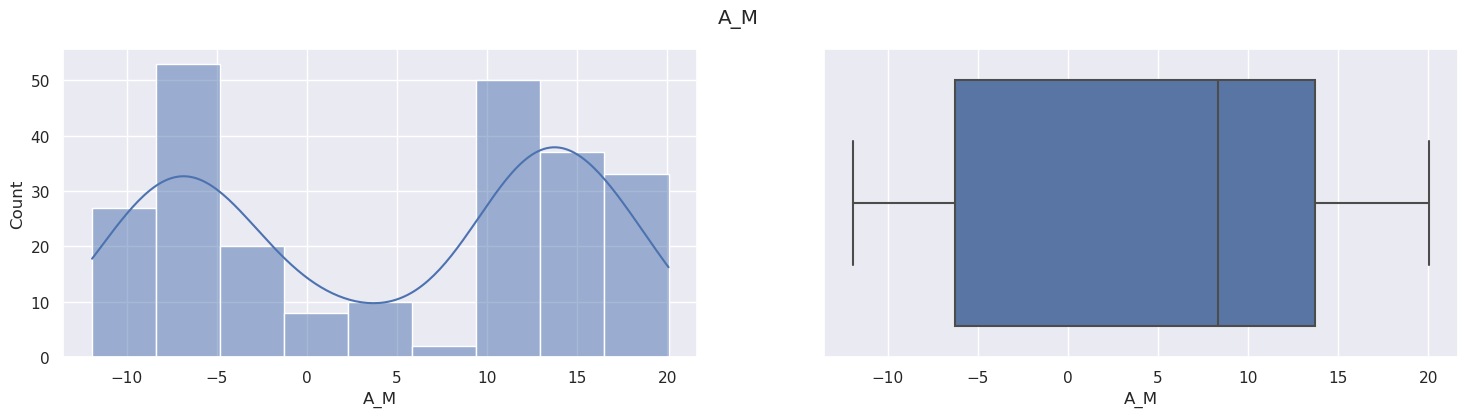

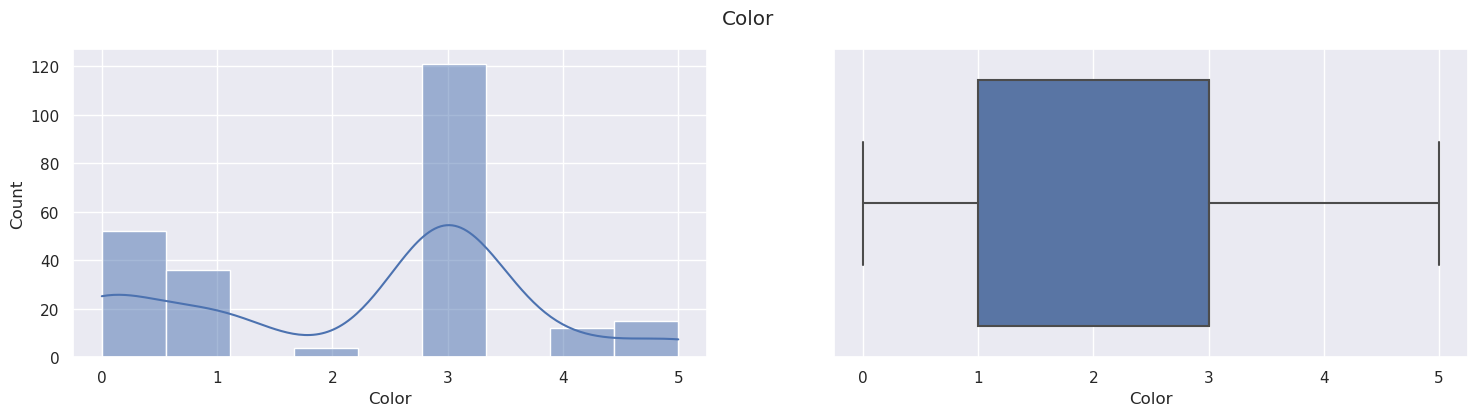

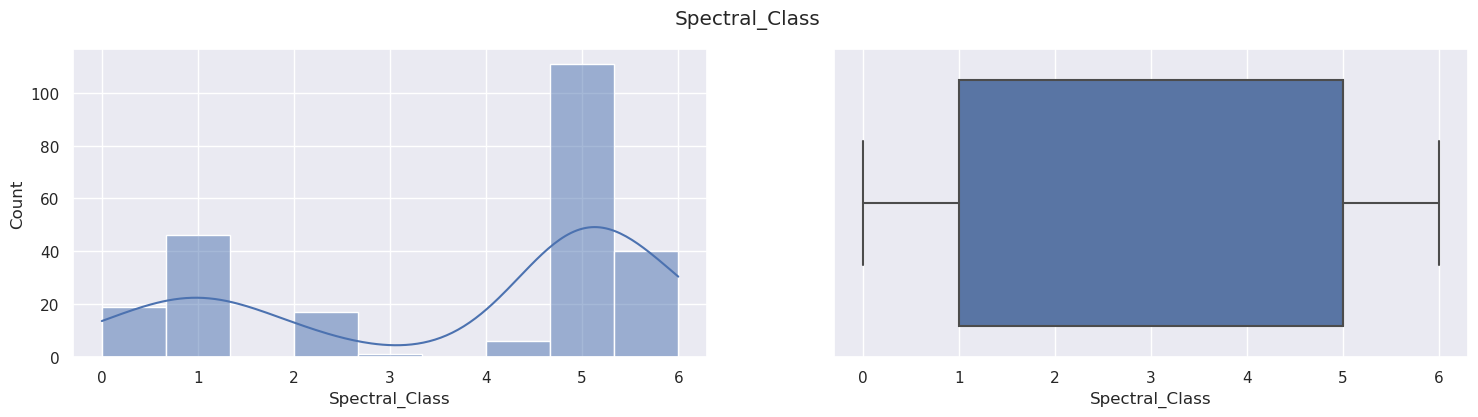

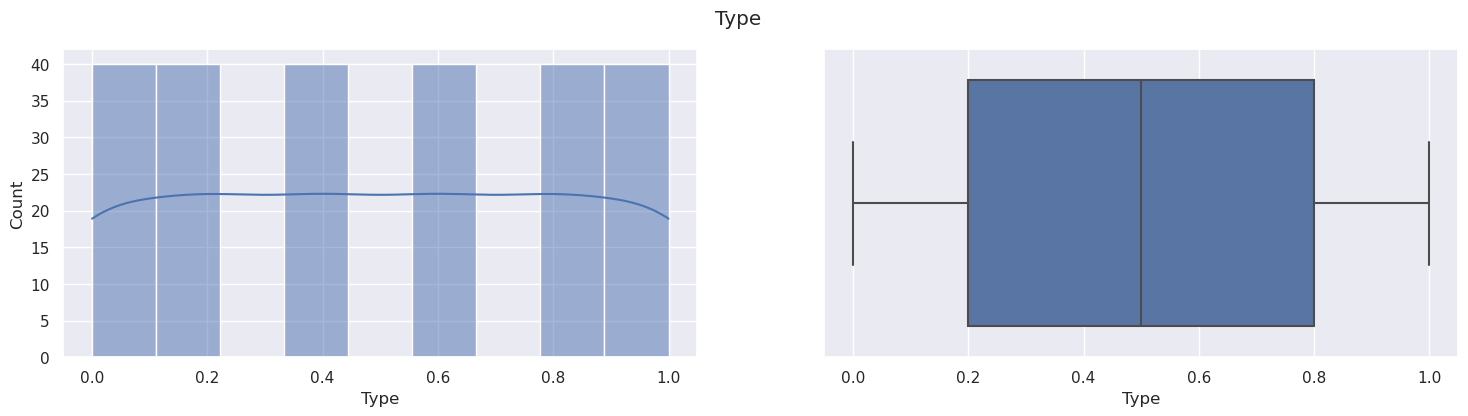

In [9]:
for column in data.columns.tolist():
    eda.plot_distribution(data, column, figures_path=FIGURES_PATH)

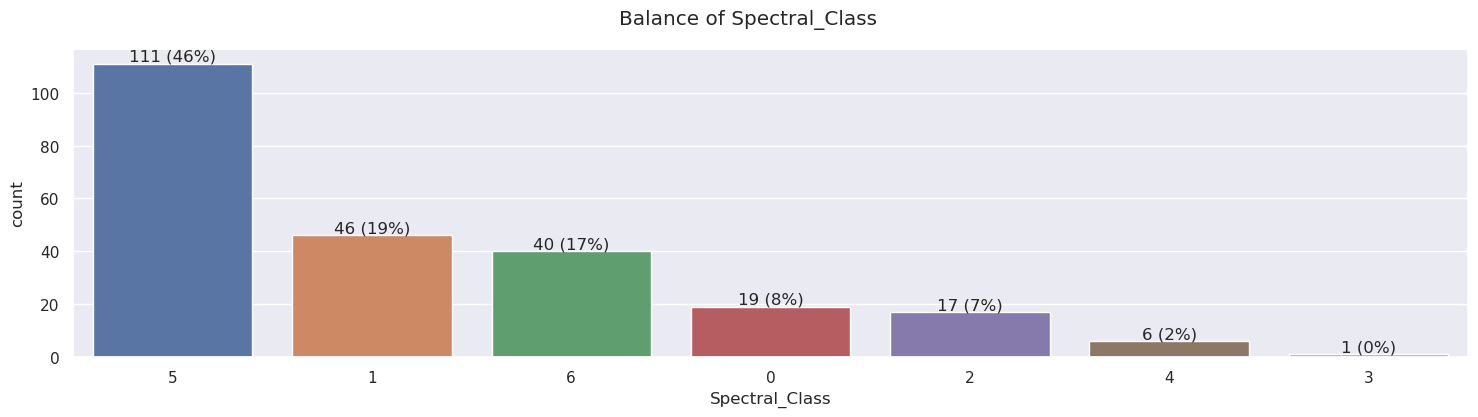

In [10]:
data_norm = data.copy()
eda.plot_count(data, "Spectral_Class", figures_path=FIGURES_PATH)

# Dimensionality reduction using Principal Component Analysis (PCA)

In [11]:
X = data_norm.drop(columns=["Spectral_Class"])
Y = data_norm['Spectral_Class'].to_numpy()

In [12]:
# Obtaining relevant attributes
pca_features = dimensionality_reduction.pca_features(X, normalize_data=True)
pca_features

,relevance
Temperature,9.999940e+01
L,6.004332e-04
R,1.513458e-07
A_M,5.818875e-09
Color,1.249800e-10
Type,2.766176e-11


In [13]:
relevant_features = pca_features.iloc[:4].index.tolist()
X_relevant = X[relevant_features]
print(f"Total gain: {pca_features.loc[relevant_features].sum(axis=0)[0]:.2f}%")
X_relevant.head(10)

Total gain: 100.00%


,Temperature,L,R,A_M
0,0.183600,0.002400,0.1700,16.12
1,0.035627,0.000500,0.1542,16.60
2,0.017367,0.000300,0.1020,18.70
3,0.022622,0.000200,0.1600,16.65
4,0.000000,0.000138,0.1030,20.06
5,0.023673,0.000650,0.1100,16.98
6,0.299545,0.000730,0.1270,17.22
7,0.017367,0.000400,0.0960,17.40
8,0.018681,0.000690,0.1100,17.45
9,0.019994,0.000180,0.1300,16.05


In [14]:
# Obtaining subspace of principal components
X_pca = dimensionality_reduction.pca(X, 2, normalize_data=False)
X_pca.head(10)

,PC1,PC2
0,0.001995,-0.060812
1,0.000051,-0.041719
2,-0.000313,0.024923
3,-0.000242,-0.047176
4,-0.000529,0.033277
5,0.000119,0.005094
6,0.000215,-0.010245
7,-0.000169,0.021982
8,0.000140,0.008326
9,-0.000283,-0.021304


In [15]:
# Convert X variables to a numpy array
X = X.to_numpy()
X_relevant = X_relevant.to_numpy()
X_pca = X_pca.to_numpy()

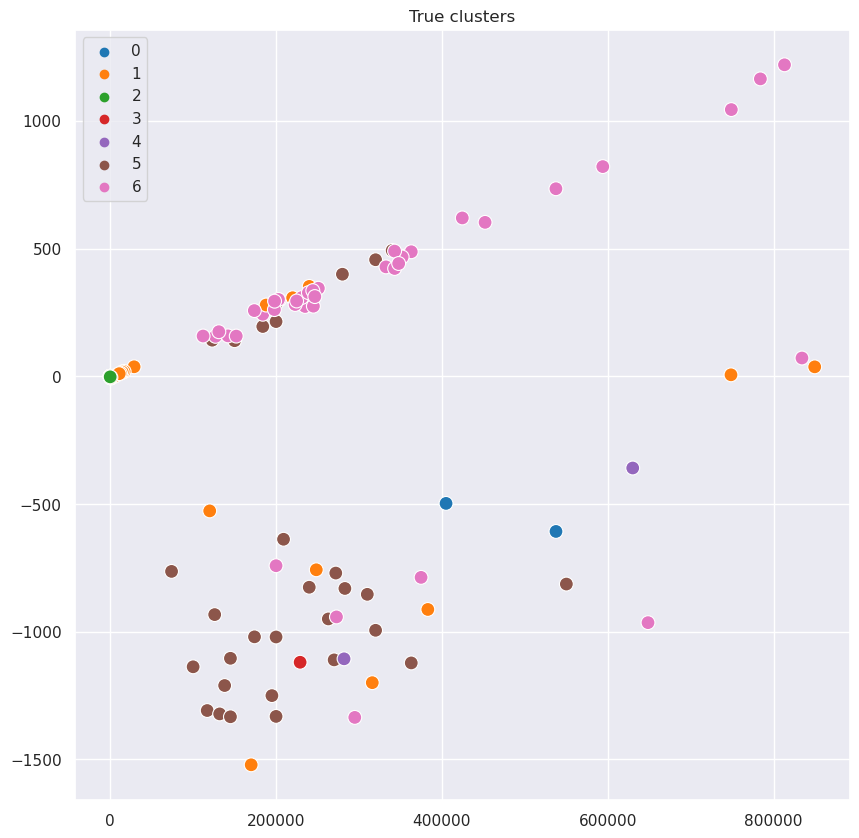

In [16]:
visualization.plot_clustering_result(X_pca, Y, title="True clusters", filename=FIGURES_PATH + "true_clusters")

In [17]:
# Write the modified DataFrame back to the CSV file
data.to_csv("../DB/Stars_mod_2.csv", index=False)

<h1><center>Clustering</center></h1>

# Using K-Means

In [18]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/Stars_mod_2.csv")

data = pd.DataFrame(data)

 11%|█         | 11/100 [00:00<00:00, 3932.27it/s]


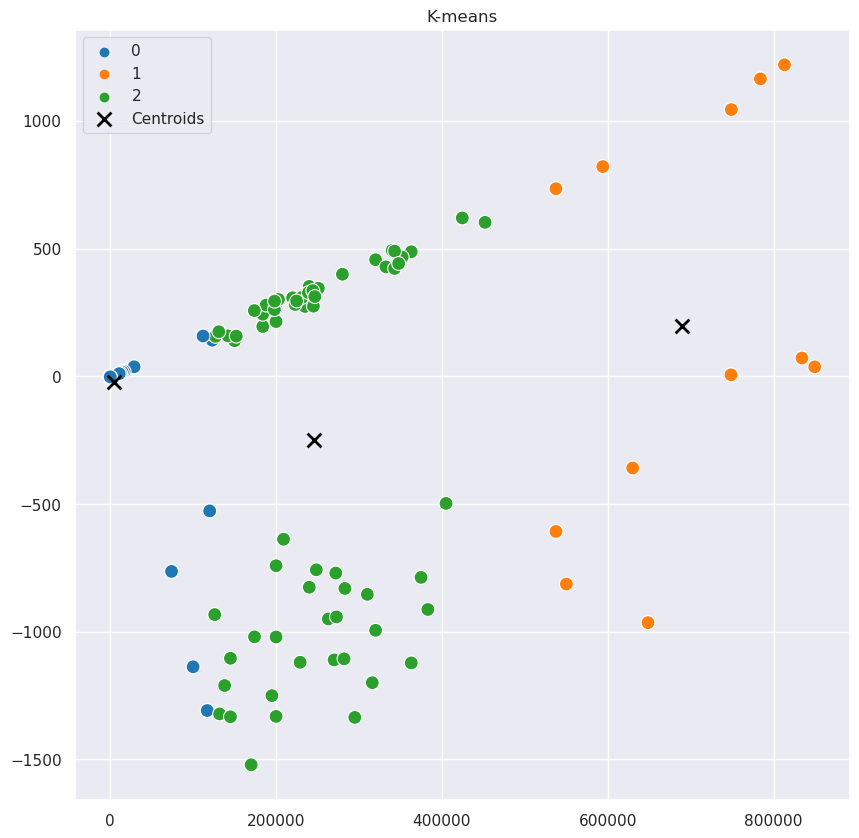

In [19]:
Y_predict, centroids = clustering.k_means(X_pca, k=3, max_iter=100, tol=1e-3)
visualization.plot_clustering_result(X_pca, Y_predict, centroids=centroids, title="K-means", filename=FIGURES_PATH + "k_means")

# Using Affinity

In [20]:
# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/Stars_mod_2.csv")

data = pd.DataFrame(data)

/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


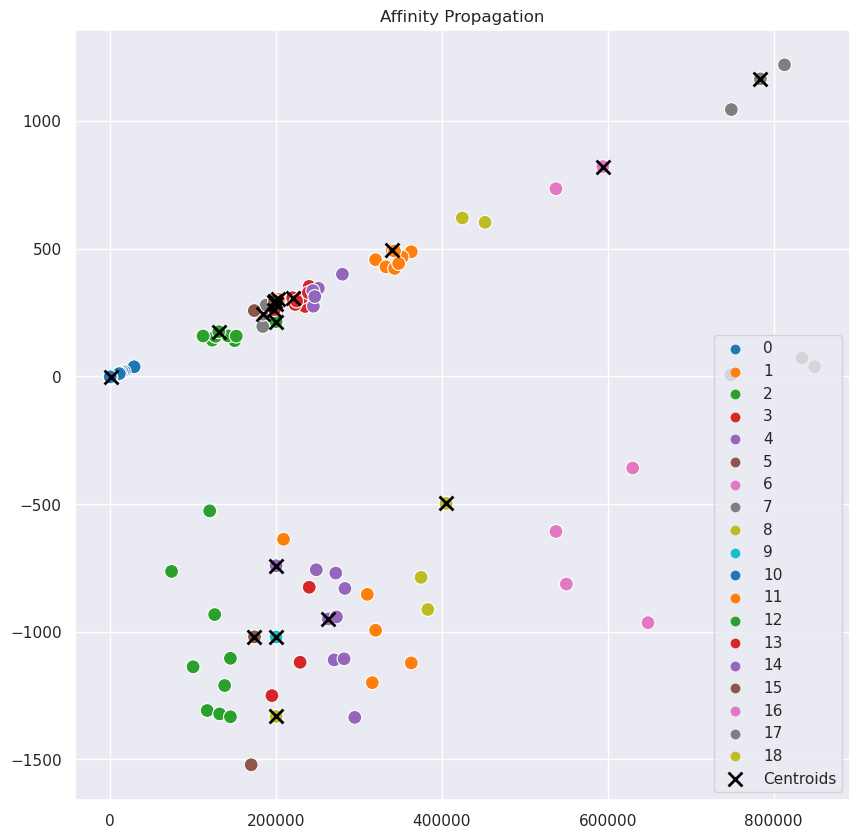

In [21]:
Y_predict, centroids = clustering.affinity_propagation(X_pca, damping=0.5, max_iter=100)
visualization.plot_clustering_result(X_pca, Y_predict, centroids=centroids, title="Affinity Propagation", filename=FIGURES_PATH + "affinity")


# Elbow Method

In [5]:
from sklearn.cluster import KMeans

# Load data from a CSV file into a Pandas DataFrame
data = pd.read_csv("../DB/Stars_mod_2.csv")

data = pd.DataFrame(data)

/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc087bb1700>
Traceback (most recent call last):
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-

/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc087b644c0>
Traceback (most recent call last):
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jxn/miniconda3/envs/tf/lib/python3.9/site-packages/threadpoolctl.py", line 515, in

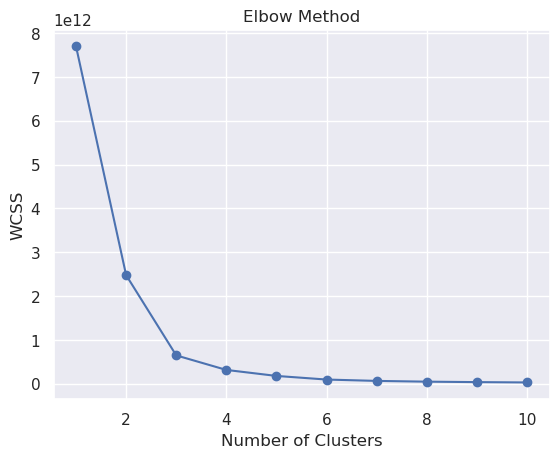

In [6]:
# Find the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters=10):
    wcss = []  # Within-cluster sum of squares

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=721)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

# Call the function with your data and specify the maximum number of clusters
find_optimal_clusters(data, max_clusters=10)